In [1]:
#Install the required libraries
!pip install pandas
!pip install numpy
!pip install mlxtend
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
#Import the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
%matplotlib inline

In [3]:
#Download the data set
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

/home/codespace/.python/current/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=36197) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


--2024-10-28 19:40:49--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 

128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [               <=>  ]  22.62M  6.83MB/s    in 3.3s    

2024-10-28 19:40:54 (6.83 MB/s) - ‘online+retail.zip’ saved [23715478]



In [4]:
#Extract the files
import zipfile
with zipfile.ZipFile('online+retail.zip', 'r') as datafilezip:
  print(datafilezip.infolist())
  datafilezip.extract("Online Retail.xlsx")

[<ZipInfo filename='Online Retail.xlsx' filemode='-rwx------' file_size=23715344>]


In [5]:
#Load the data set
df = pd.read_excel('Online Retail.xlsx')

In [ ]:
#Extract the first five entries
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
#Access the list of column names
colnames = df.columns
colnames

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
#Length of the dataframe before cleaning
len(df)

541909

In [10]:
#Identify entries with "C" in the invoice number
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df[df['InvoiceNo'].str.contains('C')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [11]:
#Identify entries with "A" in the invoice number
df[df['InvoiceNo'].str.contains('A')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [12]:
#Exclude unnecessary entries from the dataframe
df = df[~df['InvoiceNo'].str.contains('C|A')]
len(df) # this now prints 532618

532618

In [13]:
#Grouping data for specific countries
subset_df = df[df['Country'].isin(['Denmark', 'Germany', 'Italy'])]
subset_df = subset_df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum()
subset_df.head()

InvoiceNo  Description                        
536527     3 HOOK HANGER MAGIC GARDEN             12
           5 HOOK HANGER MAGIC TOADSTOOL          12
           5 HOOK HANGER RED MAGIC TOADSTOOL      12
           ASSORTED COLOUR LIZARD SUCTION HOOK    24
           CHILDREN'S CIRCUS PARADE MUG           12
Name: Quantity, dtype: int64

In [14]:
#Unpack the data
subset_df = subset_df.unstack().reset_index()
subset_df.head()

Description,InvoiceNo,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
0,536527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,536840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,536861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,536967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,536983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Replace the NaN values and make the invoice number the index
subset_df = subset_df.fillna(0)
subset_df = subset_df.set_index('InvoiceNo')
subset_df.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#View POSTAGE column
subset_df.head()['POSTAGE']

InvoiceNo
536527    1.0
536840    1.0
536861    3.0
536967    1.0
536983    1.0
Name: POSTAGE, dtype: float64

In [17]:
#Remove POSTAGE entries
subset_df = subset_df.drop("POSTAGE", axis=1)

In [19]:
#Encode the data
def hot_encode(x):
    if(x<= 0):
        return False
    else:
        return True

subset_df = subset_df.applymap(hot_encode)
subset_df.head()

/tmp/ipykernel_36197/1448825104.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  subset_df = subset_df.applymap(hot_encode)


Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536861,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536967,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536983,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
#Apply the Apriori algorithm
frq_items = apriori(subset_df, min_support=0.05, use_colnames=True)
frq_items.sort_values(['support'], ascending=[False])

,support,itemsets
37,0.237817,(ROUND SNACK BOXES SET OF4 WOODLAND )
36,0.150097,(ROUND SNACK BOXES SET OF 4 FRUITS )
26,0.134503,(PLASTERS IN TIN WOODLAND ANIMALS)
33,0.132554,(REGENCY CAKESTAND 3 TIER)
23,0.124756,(PLASTERS IN TIN CIRCUS PARADE )
56,0.122807,"(ROUND SNACK BOXES SET OF4 WOODLAND , ROUND SN..."
47,0.118908,(WOODLAND CHARLOTTE BAG)
45,0.109162,(SPACEBOY LUNCH BOX )
24,0.103314,(PLASTERS IN TIN SPACEBOY)
14,0.097466,(JUMBO BAG WOODLAND ANIMALS)


In [21]:
rules=association_rules(frq_items, metric='lift', min_threshold=1)
rules.sort_values(['lift'], ascending=[False])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(WOODLAND CHARLOTTE BAG),(RED RETROSPOT CHARLOTTE BAG),0.118908,0.068226,0.058480,0.491803,7.208431,0.050367,1.833491,0.977507
13,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.068226,0.118908,0.058480,0.857143,7.208431,0.050367,6.167641,0.924338
0,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN STRONGMAN),0.124756,0.072125,0.052632,0.421875,5.849240,0.043634,1.604973,0.947208
1,(PLASTERS IN TIN STRONGMAN),(PLASTERS IN TIN CIRCUS PARADE ),0.072125,0.124756,0.052632,0.729730,5.849240,0.043634,3.238402,0.893480
3,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE ),0.134503,0.124756,0.072125,0.536232,4.298234,0.055345,1.887244,0.886596
2,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN WOODLAND ANIMALS),0.124756,0.134503,0.072125,0.578125,4.298234,0.055345,2.051549,0.876723
9,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.134503,0.103314,0.054581,0.405797,3.927810,0.040685,1.509057,0.861245
8,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.103314,0.134503,0.054581,0.528302,3.927810,0.040685,1.834854,0.831289
15,(ROUND SNACK BOXES SET OF 4 FRUITS ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.150097,0.237817,0.122807,0.818182,3.440387,0.087111,4.192008,0.834608
14,(ROUND SNACK BOXES SET OF4 WOODLAND ),(ROUND SNACK BOXES SET OF 4 FRUITS ),0.237817,0.150097,0.122807,0.516393,3.440387,0.087111,1.757426,0.930662


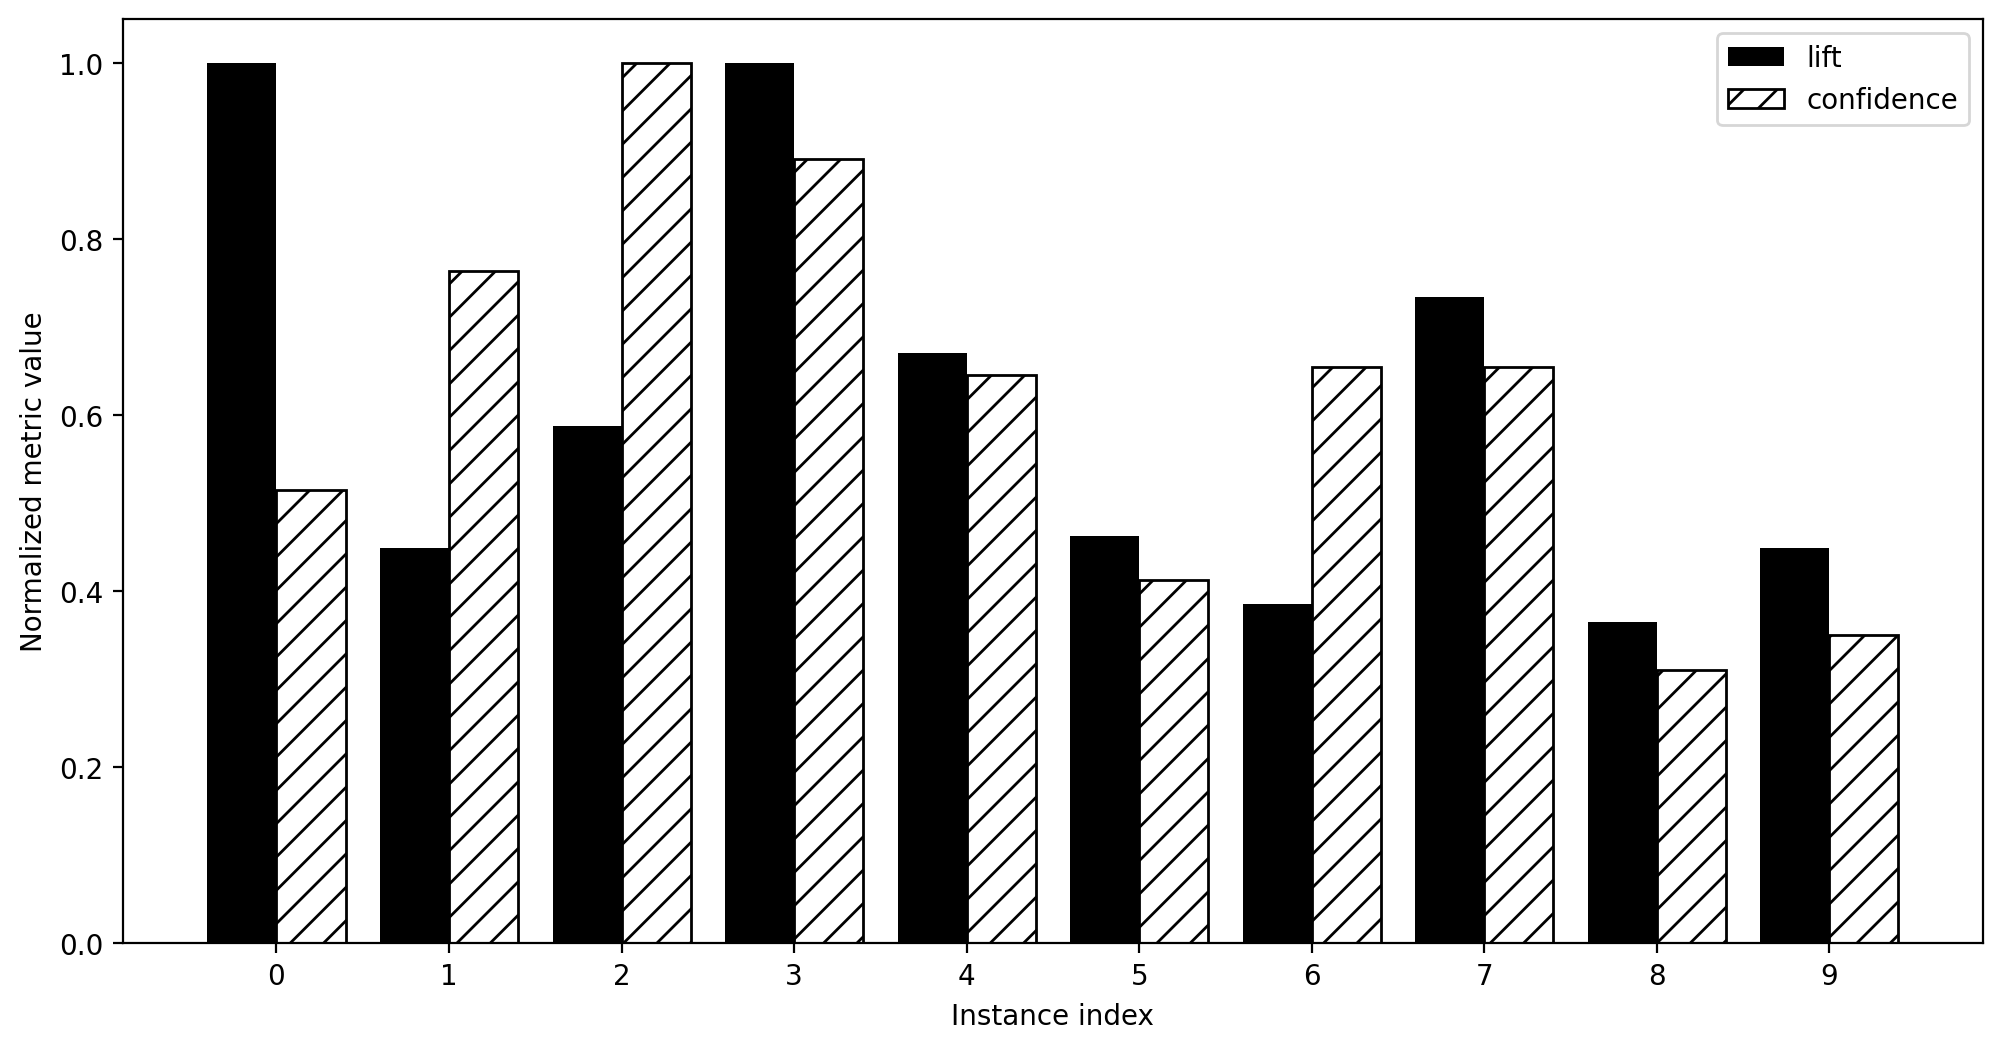

In [22]:
#Random sampling of association rules for comparison of confidence and lift values
rules_random=rules.sample(10, random_state = 42)
rules_lift = rules_random[['lift']].to_numpy()
rules_lift = (rules_lift/rules_lift.max()).transpose()[0]
rules_conf = rules_random[['confidence']].to_numpy()
rules_conf = (rules_conf/rules_conf.max()).transpose()[0]
width = 0.40
plt.figure(figsize=(12, 6), dpi=200)

# plot data in grouped manner of bar type
plt.bar(np.arange(len(rules_random))-0.2,rules_lift, width, color='black')
plt.bar(np.arange(len(rules_random))+0.2,rules_conf, width, hatch='//', edgecolor='black', facecolor='white')
plt.xlabel('Instance index')
plt.ylabel('Normalized metric value')
plt.legend(['lift','confidence'])
plt.xticks(range(0,10));